### Q1

In [23]:
import nltk
nltk.download('punkt')

def format_sentence(sent):
    return({word: True for word in nltk.word_tokenize(sent)})



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Simon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
import io
pos = []
with io.open("../data/pos_tweets.txt", 'r', encoding='utf-8') as f:
    for i in f: 
        pos.append([format_sentence(i), 'pos'])

In [25]:
neg = []
with io.open("../data/neg_tweets.txt", 'r', encoding='utf-8') as f:
    for i in f: 
        neg.append([format_sentence(i), 'neg'])

In [26]:
training = pos[:int((.8)*len(pos))] + neg[:int((.8)*len(neg))]
test = pos[int((.8)*len(pos)):] + neg[int((.8)*len(neg)):]

In [27]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(training)

In [28]:
with open("textsample1.txt", 'r', encoding='utf-8') as f:
        sample1=f.read()



print(classifier.classify(format_sentence(sample1)))

pos


In [29]:
with open("textsample2.txt", 'r', encoding='utf-8') as f:
        sample2=f.read()



print(classifier.classify(format_sentence(sample2)))

pos


### Q2

In [34]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Simon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Simon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
sample1 = []
with open("textsample1.txt", 'r', encoding='utf-8') as f:
    for i in f:
        sample1.append(i) 

words1 = nltk.word_tokenize(str(sample1))

In [36]:
default_stopwords = stopwords.words('english')
default_stopwords.extend(['...','\'re','n\'t','\'the','\'this','\'it','n\'',
                         'it\\','\'1\\ti','\'0\\ti','\'0\\tda','.\\n','..\\n',
                         '1\\ti','\'1\\tthe'])
# Remove single-character tokens (mostly punctuation)
words1 = [word for word in words1 if len(word) > 2]

# Remove numbers
# words = [word for word in words if not word.isnumeric()]

# Lowercase all words (default_stopwords are lowercase too)
words1 = [word.lower() for word in words1]

# Stemming words seems to make matters worse, disabled
# stemmer = nltk.stem.snowball.SnowballStemmer('german')
# words = [stemmer.stem(word) for word in words]

# Remove stopwords
words1 = [word for word in words1 if word not in default_stopwords]


In [37]:
# Calculate frequency distribution
fdist1 = nltk.FreqDist(words1)

# Output top 50 words

for word, frequency in fdist1.most_common(10):
    print(u'{};{}'.format(word, frequency))

love;1446
vinci;1000
awesome;992
harry;986
like;950
code;891
impossible;829
potter;818
mountain;803
mission;776


In [38]:
sample2 = []
with open("textsample2.txt", 'r', encoding='utf-8') as f:
    for i in f:
        sample2.append(i) 

words2 = nltk.word_tokenize(str(sample2))

In [39]:
# Remove single-character tokens (mostly punctuation)
words2 = [word for word in words2 if len(word) > 2]

# Remove numbers
# words = [word for word in words if not word.isnumeric()]

# Lowercase all words (default_stopwords are lowercase too)
words2 = [word.lower() for word in words2]

# Stemming words seems to make matters worse, disabled
# stemmer = nltk.stem.snowball.SnowballStemmer('german')
# words = [stemmer.stem(word) for word in words]

# Remove stopwords
words2 = [word for word in words2 if word not in default_stopwords]


In [40]:
# Calculate frequency distribution
fdist2 = nltk.FreqDist(words2)

# Output top 50 words

for word, frequency in fdist2.most_common(10):
    print(u'{};{}'.format(word, frequency))

vinci;1003
code;980
potter;908
mountain;908
harry;894
brokeback;776
0\ti;595
hate;571
sucked;571
0\tda;430


In [41]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequencies=fdist1)

(-0.5, 799.5, 399.5, -0.5)

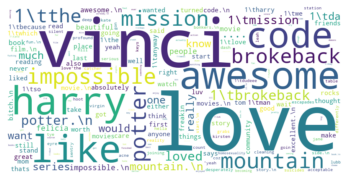

In [42]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

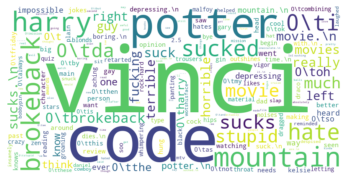

In [43]:
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequencies=fdist2)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Q3

Looking at the output, it shows that the first sample is a positive sample and the second sample is negative compared to the first sample.

## Q4

In [44]:
text_pos = []
labels_pos = []
with open("textsample1.txt","r",encoding="utf-8") as f:
    for i in f: 
        text_pos.append(i) 
        labels_pos.append('pos')

text_neg = []
labels_neg = []
with open("textsample2.txt","r",encoding="utf-8") as f:
    for i in f: 
        text_neg.append(i)
        labels_neg.append('neg')
        

training_text = text_pos[:int((.8)*len(text_pos))] + text_neg[:int((.8)*len(text_neg))]
training_labels = labels_pos[:int((.8)*len(labels_pos))] + labels_neg[:int((.8)*len(labels_neg))]

test_text = text_pos[int((.8)*len(text_pos)):] + text_neg[int((.8)*len(text_neg)):]
test_labels = labels_pos[int((.8)*len(labels_pos)):] + labels_neg[int((.8)*len(labels_neg)):]
        
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    max_features = 85
    )

features = vectorizer.fit_transform(
    training_text + test_text)

features_nd = features.toarray() # for easy use

x_train, x_test, y_train, y_test  = train_test_split(
        features_nd[0:len(training_text)], 
        training_labels,
        train_size=0.80, 
        random_state=1234)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

log_model = log_model.fit(x_train, y_train)
test_pred = log_model.predict(x_test)


f =open("text1_sentiment.txt",'w', encoding="UTF8")
for text, sentiment in zip(test_text, test_pred):
    f.write(sentiment+text+"\n")

f.close()

## Q5

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, test_pred))

0.9639084507042254
